# Minflux data extraction for one directory

Load files to analyse and export the data using MfxData class
Perform an initial data inspection of reference beads, number of tracks etc. 


In [1]:
# Some imports
import sys
import os, glob
from mfx.mfxdata import MfxData 
from mfx import utilities as utl
import re
import math

# Set path names for analysis
In the lower section the user specifies the path to the msr files, where to save the zarr file and the outputs.
A zarr file is a 'file' extracted from msr that contains all relevant information.

Note that Reading a zarr-file from network drive is still rather slow (why ?). 
Use local file for in and out of Zarr-file for the moment 

In [2]:
# Main directory that contains raw data, e.g. msr files.  Modify accordingly
INDIR  = 'Z:/siva_minflux/data'    

# Main directory to store zarr files.  Modify accordingly
OUTDIR_LOC = 'C:/Users/apoliti/Desktop/mflux_zarr_tmp_storage/analysis' 

# Main directory to store results. This can be remote directory. Modify accordingly
OUTDIR_REM =  'Z:/siva_minflux/analysis'  
  

# You can provide several key-values, i.e. keys = ['key1', 'key2', 'key3', ...]. the key-value correspond to the final 
# directory name containing the msr files.  
keys = ['Syp_ATG9']

# Combines paths to create directory names containing msr files
indir = utl.gen_directories(INDIR, 'Multiwash', keys) # e.g. indir['Syp_ATG9'] = 'Z:/siva_minflux/data/Multiwash/Syp_ATG9'
# Combines paths to create directory names to store zarrfiles result storage 
zarrdir = utl.gen_directories(OUTDIR_LOC, 'Multiwash', keys) 
# Combines paths to create directory names for result storage 
outdir = utl.gen_directories(OUTDIR_REM, 'Multiwash', keys) # e.g outdir['Syp_ATG9'] = 'Z:/siva_minflux/analysis/Multiwash/Syp_ATG9', 
# Find msr files
msr_files = utl.gen_msrfiles(indir)
msr_files



{'Syp_ATG9': ['Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220510_Syp_ATG9_ROI01.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220510_Syp_ATG9_ROI02.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220510_Syp_ATG9_ROI03.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI01.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI02.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI03.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI04.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI05.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI06.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220601_Syp_ATG9_ROI07.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220614_Syp_ATG9_ROI01.msr',
  'Z:/siva_minflux/data\\Multiwash\\Syp_ATG9\\220825_Syp_ATG9_ROI01.msr']}

# Preview Reference beads
The goal of  the lower section is to QC the data, one file at a time, and check that enough beads have been recordered throughout the experiment.  Ideally 3 beads per ROI. 

The combined standard error of mean in the bead position should be low (se_xy, se_z). If these are too high even after alignment the user can decide to remove the data completely.

The user changes the values of *id_file* to browse through all files. 


## How to improve the results
By modifying the entries in *exclude_beads* one can check the effect of removing more unstable beads and improve the results (decrease in se_xy and se_z, se = standard error).

Sometimes beads detach before the end of an experiment. By increasing *time_diff_ref* one allows to cut more of the experimental data. 


## Result outputs
The obtained results of the QC are entered in the next cell variables and comments.

Z:/siva_minflux/data\Multiwash\Syp_ATG9\220510_Syp_ATG9_ROI01.msr


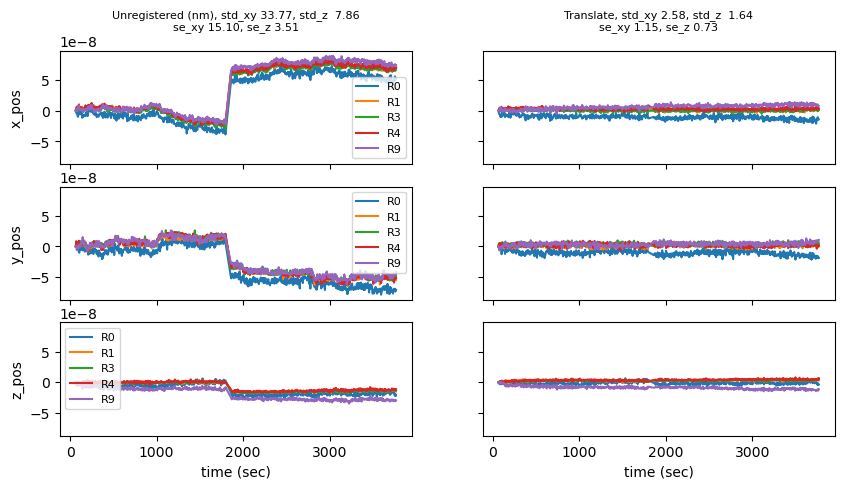

In [7]:
utl.preview_ref_beads(msr_files=msr_files, out_dir=outdir, zarr_dir=zarrdir,  key='Syp_ATG9',
             id_file=0, time_diff_ref=2000, exclude_beads= ['R2'])

# Store results of QC
The three variables are so-called *dictionaries* where the key is the name of the msr file. 


In [ ]:
# Valid msr files, for instance because lacking of common reference. This can be fixed at a later time point 
invalid_msrfile = {'220510_Syp_ATG9_ROI02.msr'} # this file will not be used
exclude_beads = {'220510_Syp_ATG9_ROI01.msr': ['R0', 'R2', 'R9'], '220510_Syp_ATG9_ROI03.msr': ['R4'], 
                 '220601_Syp_ATG9_ROI03.msr': ['R10'], '220825_Syp_ATG9_ROI01.msr': ['R13']} # list of files and beads to exclude
time_diff = {'220510_Syp_ATG9_ROI01.msr': 20} # list of files and time difference to apply. 
                                                     # when no value default of maximally 10 sec is used
# Syp_ATG9
# 220510_Syp_ATG9_ROI01.msr: 6 beads, good, exclude [R0, R2, R9] to improve precision. 
# 220510_Syp_ATG9_ROI02.msr: No common beads, needs a matching
# 220510_Syp_ATG9_ROI03.msr: Exclude R4
# 220601_Syp_ATG9_ROI01.msr: 3 beads, ok
# 220601_Syp_ATG9_ROI02.msr: 4 beads, good
# 220601_Syp_ATG9_ROI03.msr: 4 beads, ok,  exclude R10
# 220601_Syp_ATG9_ROI04.msr: 4 beads, good
# 220601_Syp_ATG9_ROI05.msr: 4 beads, ok
# 220601_Syp_ATG9_ROI06.msr: 4 beads, good
# 220601_Syp_ATG9_ROI07.msr: 3 beads, ok
# 220614_Syp_ATG9_ROI01.msr: 3 beads, ok
# 220825_Syp_ATG9_ROI01.msr: 5 beads, poor, strange fluctuations. Exclude R13. Failed to align ??. Do not use



# Alignment of data to reference beads
The measurements data are aligned to the reference beads that have been previously curated. 

In [ ]:
# Align data to beads 
utl.align_to_ref_beads(msr_files=msr_files, out_dir=outdir, zarr_dir=zarrdir, 
           invalid_msr=invalid_msrfile, exclude_beads=exclude_beads, 
           time_diff_ref=time_diff, wash_to_use='Syp_ATG9')
        